In [1]:
import nltk  
import numpy as np  
import random  
import string, re
import seaborn as sns
import matplotlib.pyplot as plt
import re
%pprint
%pprint

Pretty printing has been turned OFF
Pretty printing has been turned ON


In [2]:
raw_text = []
raw_text = open("data/March 31.txt", encoding="utf8").read()
data_corpus = raw_text.split("\n")
string_data = " ".join(data_corpus)
string_data = string_data.lower()
data_corpus = string_data.split(" ")
for i in range(len(data_corpus)):
    data_corpus[i] = re.sub(r'\W+', '', data_corpus[i])

In [3]:
with open('stopwords/stopwords-en.txt') as f:
    stop_en = [line.rstrip() for line in f]

for i in range(len(stop_en)):
    stop_en[i] = re.sub(r'\W+', '', stop_en[i])

with open('stopwords/stopwords-tl.txt') as f:
    stop_tl = [line.rstrip() for line in f]

In [4]:
#removing stop words
filt_data_corpus = []
for word in data_corpus:
    if (word not in stop_en) and (word not in stop_tl):
        filt_data_corpus.append(word)

In [5]:
wordfreq = {}
for word in filt_data_corpus:
    if word not in wordfreq.keys():
        wordfreq[word] = 1
    else:
        wordfreq[word] = wordfreq[word] + 1
        
del wordfreq['']
del wordfreq['to']

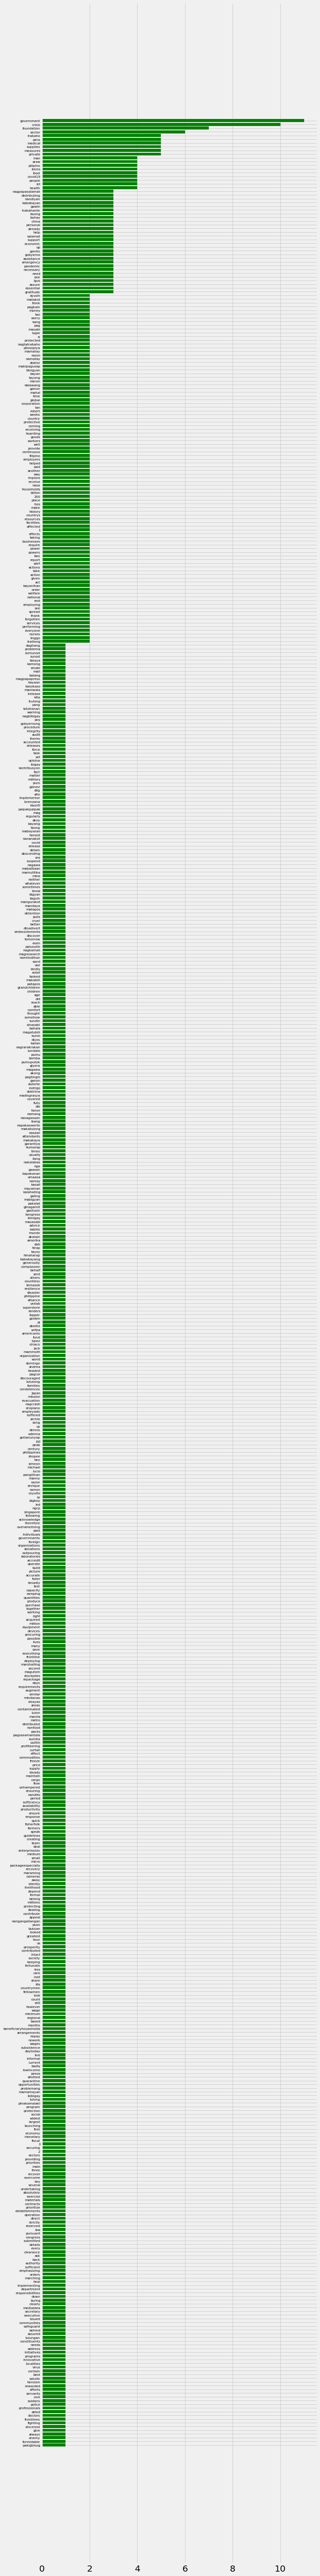

In [6]:
# Display a countplot
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,100))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=7.5) 

wordfreq = {k: v for k, v in sorted(wordfreq.items(), key=lambda item: item[1])}
countplot = plt.barh([ str(i) for i in wordfreq.keys()], wordfreq.values(), color='g')

plt.savefig('March 31.png')